In [1]:
import os
import numpy as np

import itertools

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display

from tensorflow.keras.preprocessing.image import array_to_img


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_BREADTH = 32
COLOR_CHANNELS = 3
NR_CLASSES = 10
TOTAL_INPUTS = IMAGE_WIDTH*IMAGE_BREADTH*COLOR_CHANNELS
VALIDATION_SIZE = 10000

In [3]:
(x_train_all, y_train_all), (x_test, y_test)=cifar10.load_data()

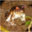

In [4]:
pic=array_to_img(x_train_all[0])
pic

In [5]:
x_train_all , x_test = x_train_all/255.0, x_test/255.0

In [6]:
x_train_all=x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)
x_train_all.shape

(50000, 3072)

In [7]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
x_test.shape

(10000, 3072)

In [8]:
x_val= x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [9]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [10]:
model_3 = Sequential()

model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))

model_3.add(Dense(128, activation='relu', name='m3_hidden1'))

model_3.add(Dropout(0.25, seed=42))

model_3.add(Dense(64, activation='relu', name='m3_hidden2'))

model_3.add(Dense(16, activation='relu', name='m3_hidden3'))

model_3.add(Dense(10, activation='softmax', name='m3_output'))


model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [15]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m3_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 m3_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m3_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m3_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trai

In [16]:
nr_epochs = 10
history=model_3.fit(x_train, y_train, batch_size = 1000, epochs = nr_epochs, verbose = 1, validation_data = (x_val, y_val))
print(history.history.keys())

Epoch 1/10
40/40 [==============================] - 2s 55ms/step - loss: 1.5506 - accuracy: 0.4442 - val_loss: 1.5441 - val_accuracy: 0.4490
Epoch 2/10
40/40 [==============================] - 1s 37ms/step - loss: 1.5435 - accuracy: 0.4449 - val_loss: 1.5440 - val_accuracy: 0.4456
Epoch 3/10
40/40 [==============================] - 1s 37ms/step - loss: 1.5486 - accuracy: 0.4401 - val_loss: 1.5517 - val_accuracy: 0.4456
Epoch 4/10
40/40 [==============================] - 1s 37ms/step - loss: 1.5427 - accuracy: 0.4451 - val_loss: 1.5533 - val_accuracy: 0.4487
Epoch 5/10
40/40 [==============================] - 1s 36ms/step - loss: 1.5389 - accuracy: 0.4461 - val_loss: 1.5371 - val_accuracy: 0.4518
Epoch 6/10
40/40 [==============================] - 1s 36ms/step - loss: 1.5478 - accuracy: 0.4422 - val_loss: 1.5447 - val_accuracy: 0.4452
Epoch 7/10
40/40 [==============================] - 1s 36ms/step - loss: 1.5469 - accuracy: 0.4419 - val_loss: 1.5534 - val_accuracy: 0.4468
Epoch 8/10
40

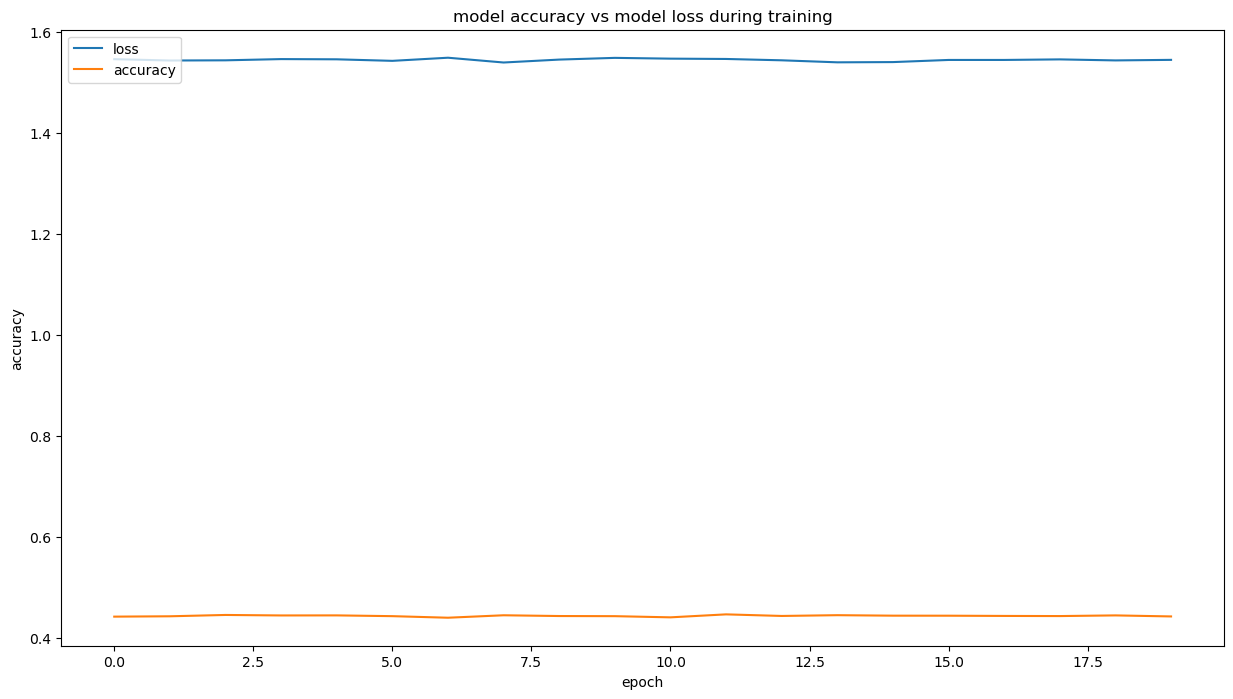

In [18]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy vs model loss during training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

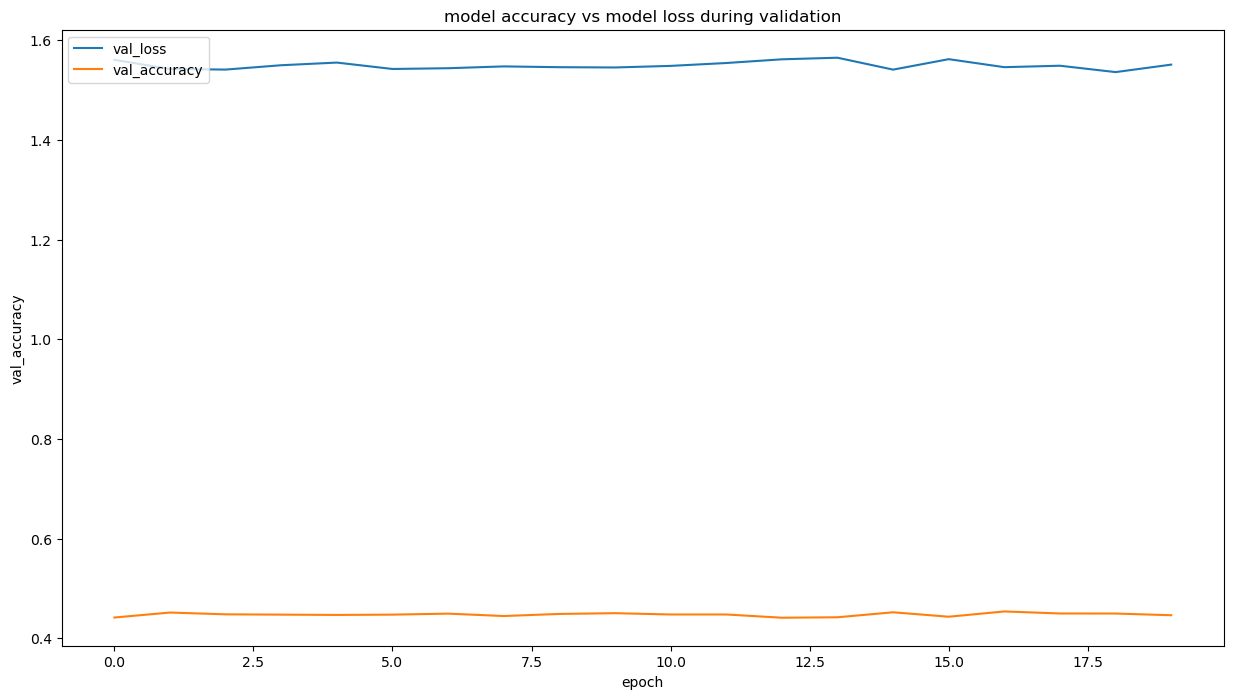

In [19]:
plt.figure(figsize=(15,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy vs model loss during validation')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper left')
plt.show()

In [20]:
test=np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 3072)

In [21]:
np.set_printoptions(precision = 3)

In [23]:
model_3.predict(test)

1/1 [==============================] - 0s 335ms/step


array([[0.014, 0.006, 0.103, 0.176, 0.099, 0.088, 0.463, 0.045, 0.001,
        0.004]], dtype=float32)

In [25]:
np.argmax(model_3.predict(test), axis =1)[0]

1/1 [==============================] - 0s 53ms/step


6

In [26]:
for number in range(20):
    
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = np.argmax(model_3.predict(test_img)[0])
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

1/1 [==============================] - 0s 49ms/step
Actual value: 6 vs. predicted: 6
1/1 [==============================] - 0s 64ms/step
Actual value: 9 vs. predicted: 1
1/1 [==============================] - 0s 49ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 40ms/step
Actual value: 4 vs. predicted: 6
1/1 [==============================] - 0s 51ms/step
Actual value: 1 vs. predicted: 9
1/1 [==============================] - 0s 50ms/step
Actual value: 1 vs. predicted: 7
1/1 [==============================] - 0s 47ms/step
Actual value: 2 vs. predicted: 6
1/1 [==============================] - 0s 49ms/step
Actual value: 7 vs. predicted: 7
1/1 [==============================] - 0s 49ms/step
Actual value: 8 vs. predicted: 8
1/1 [==============================] - 0s 50ms/step
Actual value: 3 vs. predicted: 6
1/1 [==============================] - 0s 49ms/step
Actual value: 4 vs. predicted: 4
1/1 [==============================] - 0s 57ms/step
Actual value:

In [28]:
test_loss, test_accuracy=model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5537 - accuracy: 0.4446


In [30]:
predictions = np.argmax(model_3.predict(x_test), axis = 1)

313/313 [==============================] - 1s 4ms/step


In [32]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [33]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [34]:
conf_matrix

array([[418,  19, 116,  36,  88,   3,  49,  34, 179,  58],
       [ 38, 502,  47,  45,  34,   7,  63,  25,  51, 188],
       [ 53,  13, 345,  66, 266,  20, 165,  43,  17,  12],
       [ 11,   8, 139, 281, 119,  79, 266,  41,  28,  28],
       [ 33,   1, 136,  44, 529,   7, 177,  41,  18,  14],
       [  7,   6, 181, 209, 131, 194, 182,  42,  32,  16],
       [  3,   2,  90,  61, 187,  13, 622,   9,   4,   9],
       [ 25,   5, 106,  73, 201,  34,  89, 417,  13,  37],
       [ 70,  59,  26,  37,  63,  12,  50,   7, 582,  94],
       [ 32, 126,  18,  56,  29,   8,  74,  49,  52, 556]], dtype=int64)

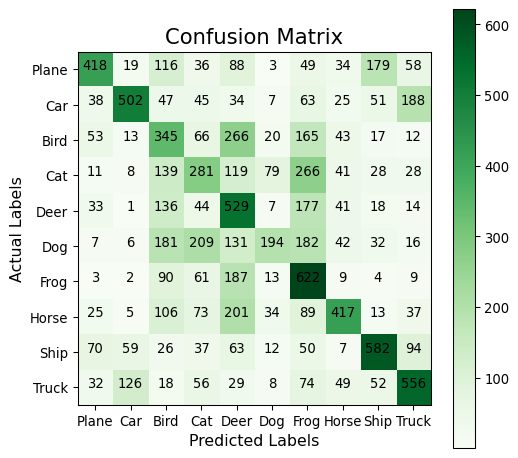

In [35]:
plt.figure(figsize=(6,6), dpi=95)

plt.imshow(conf_matrix, cmap = plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)


for i , j in itertools.product(range(nr_rows), range(nr_cols)):
    
    plt.text(j,i, conf_matrix[i,j],horizontalalignment = 'center' )
    #plt.text(x, y, s, fontdict=None, **kwargs)



tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

plt.show()

In [36]:
# TP...

np.diag(conf_matrix)

array([418, 502, 345, 281, 529, 194, 622, 417, 582, 556], dtype=int64)

In [37]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.418, 0.502, 0.345, 0.281, 0.529, 0.194, 0.622, 0.417, 0.582,
       0.556])

In [38]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.606, 0.677, 0.287, 0.309, 0.321, 0.515, 0.358, 0.589, 0.596,
       0.549])

In [39]:
avg_recall = np.mean(recall)
avg_recall

0.4446

In [40]:
avg_precision = np.mean(precision)
avg_precision

0.4807845406982141

In [41]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
f1_score

0.46198482337546687